In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# بارگذاری داده‌ها
data = pd.read_csv('/content/nci.data.csv')

# تقسیم داده‌ها به ویژگی‌های عددی و دسته‌ای
numeric_features = data.select_dtypes(include=[np.number])  # ویژگی‌های عددی
categorical_features = data.select_dtypes(exclude=[np.number])  # ویژگی‌های دسته‌ای

# استانداردسازی داده‌های عددی
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# محاسبه فاصله‌ها برای ویژگی‌های عددی
def compute_numeric_distances(X):
    # Minkowski Distance (Lp-Metric)
    minkowski_dist = cdist(X, X, metric='minkowski', p=3)  # می‌توانید مقدار p را تغییر دهید

    # Euclidean Distance (p = 2)
    euclidean_dist = cdist(X, X, metric='euclidean')

    # Manhattan Distance (p = 1)
    manhattan_dist = cdist(X, X, metric='cityblock')

    # Maximum Metric (p → ∞)
    max_metric_dist = cdist(X, X, metric='chebyshev')

    return minkowski_dist, euclidean_dist, manhattan_dist, max_metric_dist

# محاسبه فاصله‌ها برای ویژگی‌های دسته‌ای (Hamming Distance)
def compute_categorical_distances(categorical_data):
    # تبدیل ویژگی‌های دسته‌ای به اعداد
    encoder = LabelEncoder()
    categorical_data_encoded = categorical_data.apply(encoder.fit_transform)

    # Hamming Distance
    hamming_dist = pairwise_distances(categorical_data_encoded, metric='hamming')

    return hamming_dist

# محاسبه فاصله‌ها برای ویژگی‌های متنی (Cosine Distance)
def compute_cosine_distance(text_data):
    # استفاده از CountVectorizer برای تبدیل متن به بردار عددی
    vectorizer = CountVectorizer()
    text_data_vectorized = vectorizer.fit_transform(text_data)

    # محاسبه فاصله کسینوسی
    cosine_dist = 1 - cosine_similarity(text_data_vectorized)
    return cosine_dist

# تابع فاصله برای مجموعه‌ها (Set Distance)
def compute_set_distance(x, y):
    intersection = len(set(x) & set(y))
    union = len(set(x) | set(y))
    return (union - intersection) / union

# اجرای PCA
def perform_pca(numeric_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(numeric_data)
    return pca_result

# محاسبه فاصله‌ها برای ویژگی‌های عددی
minkowski_dist, euclidean_dist, manhattan_dist, max_metric_dist = compute_numeric_distances(numeric_features_scaled)

# اگر داده‌های متنی موجود است، فاصله کسینوسی را محاسبه کنید
# فرض می‌کنیم که ویژگی‌های متنی در categorical_features موجود هستند و برای محاسبه فاصله‌های متنی از این داده‌ها استفاده می‌شود
# برای این که مثال واضح باشد، فرض کنید categorical_features شامل ویژگی‌های متنی باشد
text_data = categorical_features.apply(lambda x: x.str.join(' '), axis=1)  # تبدیل به متن ترکیبی
cosine_dist = compute_cosine_distance(text_data)

# اگر ویژگی‌های دسته‌ای موجود باشد، فاصله هامینگ را محاسبه کنید
hamming_dist = compute_categorical_distances(categorical_features)

# اجرای PCA برای داده‌های عددی استاندارد شده
pca_result = perform_pca(numeric_features_scaled)

# نمایش نتایج PCA
print(f"PCA Result: \n{pca_result}")

# نمایش یک نمونه از فاصله‌ها
print(f"Minkowski Distance: \n{minkowski_dist[:5, :5]}")
print(f"Euclidean Distance: \n{euclidean_dist[:5, :5]}")
print(f"Manhattan Distance: \n{manhattan_dist[:5, :5]}")
print(f"Maximum Metric Distance: \n{max_metric_dist[:5, :5]}")
print(f"Hamming Distance (Categorical): \n{hamming_dist[:5, :5]}")
print(f"Cosine Distance (Textual): \n{cosine_dist[:5, :5]}")


PCA Result: 
[[ 0.83014744  0.04819327]
 [-0.52557385 -0.40606902]
 [-0.12937388  0.42643267]
 ...
 [-1.06904258 -1.09748347]
 [-2.3350855  -0.42521787]
 [-6.06628801  0.78908772]]
Minkowski Distance: 
[[0.         4.62745081 3.19363697 7.0470499  4.41659246]
 [4.62745081 0.         4.43425773 7.01506807 5.08283314]
 [3.19363697 4.43425773 0.         6.82140322 3.91721304]
 [7.0470499  7.01506807 6.82140322 0.         7.14860387]
 [4.41659246 5.08283314 3.91721304 7.14860387 0.        ]]
Euclidean Distance: 
[[ 0.          7.75096832  5.53643325 12.48991459  7.30757909]
 [ 7.75096832  0.          7.46307966 12.38169127  8.5719347 ]
 [ 5.53643325  7.46307966  0.         11.67259807  6.42467035]
 [12.48991459 12.38169127 11.67259807  0.         12.30742036]
 [ 7.30757909  8.5719347   6.42467035 12.30742036  0.        ]]
Manhattan Distance: 
[[ 0.         49.06251097 35.50997733 83.80357121 44.14231697]
 [49.06251097  0.         45.00684225 81.70157108 52.9910454 ]
 [35.50997733 45.006842

PCA Result: 
[[ 0.83014744  0.04819327]
 [-0.52557385 -0.40606902]
 [-0.12937388  0.42643267]
 ...
 [-1.06904258 -1.09748347]
 [-2.3350855  -0.42521787]
 [-6.06628801  0.78908772]]


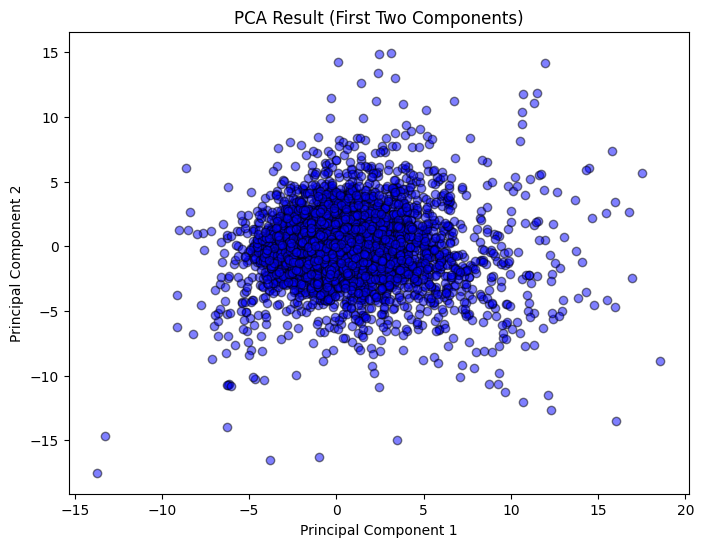

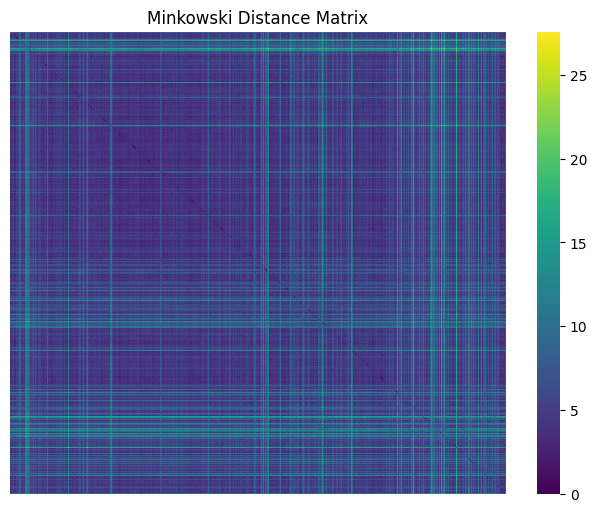

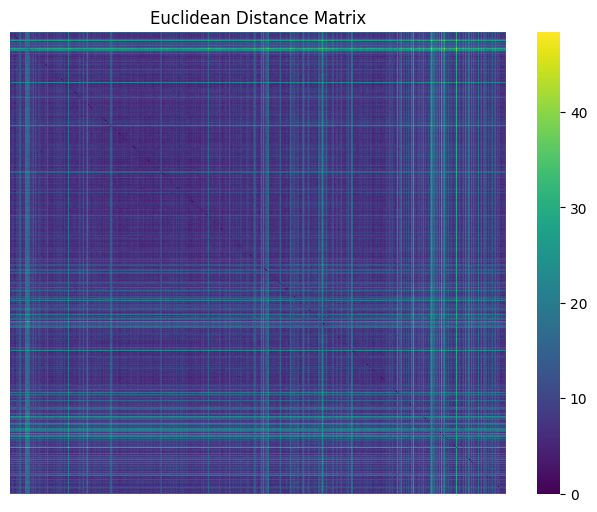

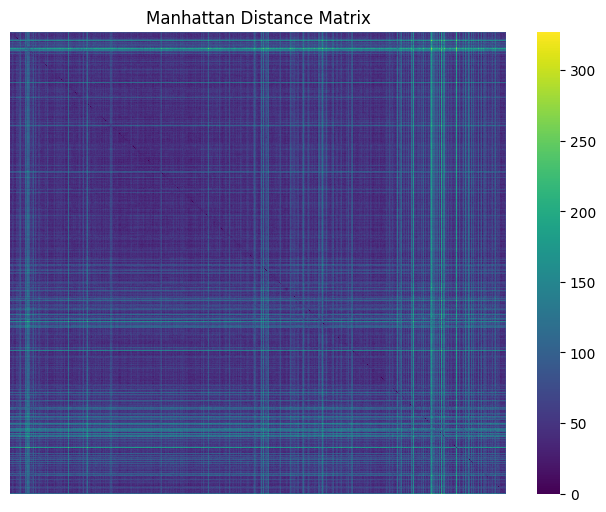

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# بارگذاری داده‌ها
data = pd.read_csv('/content/nci.data.csv')

# تقسیم داده‌ها به ویژگی‌های عددی و دسته‌ای
numeric_features = data.select_dtypes(include=[np.number])  # ویژگی‌های عددی
categorical_features = data.select_dtypes(exclude=[np.number])  # ویژگی‌های دسته‌ای

# استانداردسازی داده‌های عددی
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# محاسبه فاصله‌ها برای ویژگی‌های عددی
def compute_numeric_distances(X):
    # Minkowski Distance (Lp-Metric)
    minkowski_dist = cdist(X, X, metric='minkowski', p=3)  # می‌توانید مقدار p را تغییر دهید

    # Euclidean Distance (p = 2)
    euclidean_dist = cdist(X, X, metric='euclidean')

    # Manhattan Distance (p = 1)
    manhattan_dist = cdist(X, X, metric='cityblock')

    # Maximum Metric (p → ∞)
    max_metric_dist = cdist(X, X, metric='chebyshev')

    return minkowski_dist, euclidean_dist, manhattan_dist, max_metric_dist

# محاسبه فاصله‌ها برای ویژگی‌های دسته‌ای (Hamming Distance)
def compute_categorical_distances(categorical_data):
    # تبدیل ویژگی‌های دسته‌ای به اعداد
    encoder = LabelEncoder()
    categorical_data_encoded = categorical_data.apply(encoder.fit_transform)

    # Hamming Distance
    hamming_dist = pairwise_distances(categorical_data_encoded, metric='hamming')

    return hamming_dist

# محاسبه فاصله‌ها برای ویژگی‌های متنی (Cosine Distance)
def compute_cosine_distance(text_data):
    # استفاده از CountVectorizer برای تبدیل متن به بردار عددی
    vectorizer = CountVectorizer()
    text_data_vectorized = vectorizer.fit_transform(text_data)

    # محاسبه فاصله کسینوسی
    cosine_dist = 1 - cosine_similarity(text_data_vectorized)
    return cosine_dist

# تابع فاصله برای مجموعه‌ها (Set Distance)
def compute_set_distance(x, y):
    intersection = len(set(x) & set(y))
    union = len(set(x) | set(y))
    return (union - intersection) / union

# اجرای PCA
def perform_pca(numeric_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(numeric_data)
    return pca_result

# محاسبه فاصله‌ها برای ویژگی‌های عددی
minkowski_dist, euclidean_dist, manhattan_dist, max_metric_dist = compute_numeric_distances(numeric_features_scaled)

# اگر داده‌های متنی موجود است، فاصله کسینوسی را محاسبه کنید
text_data = categorical_features.apply(lambda x: x.str.join(' '), axis=1)  # تبدیل به متن ترکیبی
cosine_dist = compute_cosine_distance(text_data)

# اگر ویژگی‌های دسته‌ای موجود باشد، فاصله هامینگ را محاسبه کنید
hamming_dist = compute_categorical_distances(categorical_features)

# اجرای PCA برای داده‌های عددی استاندارد شده
pca_result = perform_pca(numeric_features_scaled)

# نمایش نتایج PCA
print(f"PCA Result: \n{pca_result}")

# نمودار پراکندگی PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolors='k', alpha=0.5)
plt.title("PCA Result (First Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# نمایش ماتریس فاصله Minkowski
plt.figure(figsize=(8, 6))
sns.heatmap(minkowski_dist, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title("Minkowski Distance Matrix")
plt.show()

# نمایش ماتریس فاصله Euclidean
plt.figure(figsize=(8, 6))
sns.heatmap(euclidean_dist, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title("Euclidean Distance Matrix")
plt.show()

# نمایش ماتریس فاصله Manhattan
plt.figure(figsize=(8, 6))
sns.heatmap(manhattan_dist, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title("Manhattan Distance Matrix")
plt.show()

# نمایش ماتریس فاصله Maximum Metric
plt.figure(figsize=(8, 6))
sns.heatmap(max_metric_dist, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title("Maximum Metric Distance Matrix")
plt.show()

# نمایش ماتریس فاصله Hamming (برای داده‌های دسته‌ای)
plt.figure(figsize=(8, 6))
sns.heatmap(hamming_dist, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title("Hamming Distance Matrix (Categorical Data)")
plt.show()

# نمایش ماتریس فاصله Cosine (برای داده‌های متنی)
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_dist, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title("Cosine Distance Matrix (Textual Data)")
plt.show()


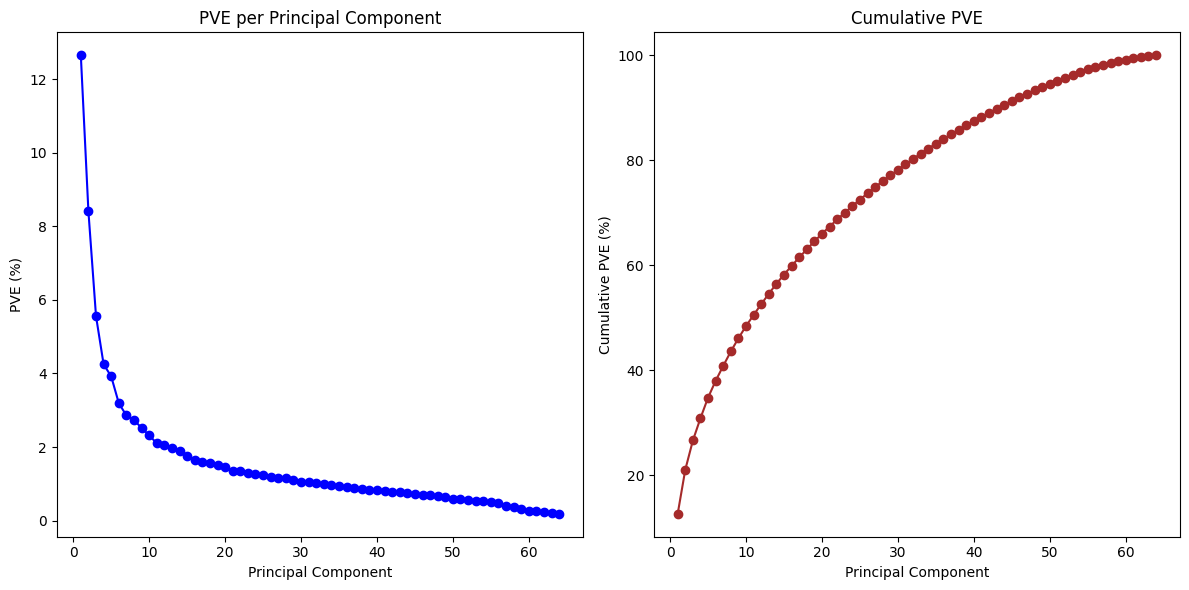

Explained Variance Ratio (PVE): [12.64954989  8.40587955  5.55990008  4.25135776  3.92130077  3.19440893
  2.85888839  2.73882796  2.51803696  2.32202207  2.10051096  2.06514126
  1.97994703  1.90131495  1.76564035  1.63685492  1.60524121  1.55671353
  1.51557856  1.46274305  1.35838181  1.34704197  1.30056179  1.25581203
  1.23844193  1.19466702  1.16264567  1.14944692  1.09428504  1.06332593
  1.04541793  1.03014346  1.00273634  0.96311308  0.93212299  0.90603854
  0.89704689  0.85746212  0.82904509  0.8281166   0.80136443  0.77629007
  0.76820063  0.75089108  0.71527128  0.7076913   0.6854704   0.66633552
  0.63813688  0.59554373  0.58578755  0.56936484  0.54170734  0.52329848
  0.50186296  0.47170353  0.41010276  0.3646161   0.32163728  0.27503358
  0.25181824  0.22699859  0.1984722   0.18668989]
Cumulative Explained Variance: [ 12.64954989  21.05542944  26.61532952  30.86668728  34.78798804
  37.98239697  40.84128536  43.58011333  46.09815028  48.42017235
  50.52068331  52.5858245

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# بارگذاری داده‌ها از فایل CSV
nci_data = pd.read_csv('nci.data.csv')

# حذف ستون‌های غیر عددی (در صورت وجود)
nci_data_numeric = nci_data.select_dtypes(include=[np.number])

# استانداردسازی داده‌ها (هر ویژگی را با میانگین صفر و انحراف معیار یک مقیاس می‌کنیم)
scaler = StandardScaler()
nci_data_scaled = scaler.fit_transform(nci_data_numeric)

# اجرای PCA
pca = PCA()
pca.fit(nci_data_scaled)

# محاسبه درصد واریانس توضیح داده شده (PVE)
pve = 100 * (pca.explained_variance_ratio_)

# رسم نمودار PVE (Scree Plot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pve) + 1), pve, marker='o', color='blue')
plt.title("PVE per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("PVE (%)")

# محاسبه و رسم نمودار واریانس تجمعی
cumulative_pve = np.cumsum(pve)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_pve) + 1), cumulative_pve, marker='o', color='brown')
plt.title("Cumulative PVE")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative PVE (%)")

# نمایش نمودارها
plt.tight_layout()
plt.show()

# نمایش summary از نتایج PCA (مقدار واریانس توضیح داده شده و تجمعی)
print(f"Explained Variance Ratio (PVE): {pve}")
print(f"Cumulative Explained Variance: {cumulative_pve}")
